# **Data Preparation using Autoviml**

Dataset - https://www.kaggle.com/datasets/yasserh/song-popularity-dataset


In [ ]:
# Installations
!pip install featurewiz
!pip install lazytransform
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 4.9 MB/s 
     |████████████████████████████████| 3.1 MB 35.6 MB/s 
     |████████████████████████████████| 2.0 MB 40.6 MB/s 
     |████████████████████████████████| 72 kB 792 kB/s 
     |████████████████████████████████| 26.7 MB 55.2 MB/s 
     |████████████████████████████████| 96 kB 3.2 MB/s 
     |████████████████████████████████| 255.9 MB 45 kB/s 
     |████████████████████████████████| 1.6 MB 46.2 MB/s 
     |████████████████████████████████| 120 kB 57.3 MB/s 
     |████████████████████████████████| 82 kB 835 kB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 268 kB 10.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Using cached category_encoders-2.5.1.post0-py2.py3-none-any.whl (72 kB)
     |████████████████████████████████| 71 kB 8.5 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
INFO: pip is looking at multiple versions of lazytransform to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 54 kB 3.1 MB/s 
INFO: pip is looking at multiple versions of category-encoders to deter

In [ ]:
# Imports
import pandas as pd
import opendatasets as od
from lazytransform import LazyTransformer
from featurewiz import FeatureWiz

pd.set_option('display.max_columns', None)

Imported LazyTransformer version:0.78. Call by using:
    lazy = LazyTransformer(model=None, encoders='auto', scalers=None, date_to_string=False,
        transform_target=False, imbalanced=False, save=False, combine_rare=False, verbose=0)
    ### if you are not using a model in pipeline, you must use fit and transform ###
        X_trainm, y_trainm = lazy.fit_transform(X_train, y_train)
        X_testm = lazy.transform(X_test)
    ### If using a model in pipeline, use fit and predict only ###
        lazy.fit(X_train, y_train)
        lazy.predict(X_test)

Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 98.4kB/s]


In [ ]:
od.download('https://www.kaggle.com/datasets/yasserh/song-popularity-dataset')

100%|██████████| 805k/805k [00:00<00:00, 51.6MB/s]

In [ ]:
# Read data
df = pd.read_csv('/content/song-popularity-dataset/song_data.csv')

In [ ]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Data Cleaning and Preparation

In [ ]:
# Convert from numeric to category for categorical features

df['key'] = df.key.astype('category')
df['audio_mode'] = df.audio_mode.astype('category')
df['time_signature'] = df.time_signature.astype('category')

In [ ]:
df.dtypes

song_name             object
song_popularity        int64
song_duration_ms       int64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
audio_mode          category
speechiness          float64
tempo                float64
time_signature      category
audio_valence        float64
dtype: object

In [ ]:
# Split df into dependent and independent variables
y_train, X_train = df.pop('song_popularity'), df

In [ ]:
# Data transformation using lazytransformer
lazy = LazyTransformer(model = None, encoders = 'auto', scalers = 'std', verbose = 2)
train_transformed, y_transformed = lazy.fit_transform(X_train, y_train)

#### Single_Label Regression problem ####
Shape of dataset: (18835, 14). Now we classify variables into different types...
    since song_name's max string size 143 >= 50, re-classifying it as NLP variable
    Returning dictionary for variable types with following keys:
                        continuous_vars = 9, int_vars = 1, 
                        discrete_string_vars = 0, nlp_vars = 1,
                        date_vars = 0, time_deltas = 0,
                        categorical_vars = 3, date_zones = 0
    no date time variables detected in this dataset
    Beware! onehot encoding can create hundreds if not 1000s of variables...
Using OneHotEncoder() and My_LabelEncoder() as encoders
    4 components chosen for TruncatedSVD(n_iter=0) after TFIDF
Caution: ### When you have categorical or date-time vars in data, scaling may not be helpful. ##
Check the pipeline creation statement for errors (if any):
	make_column_transformer((lep_one, catvars[0]),(lep_one, catvars[1]),(lep_one, catva

In [ ]:
train_transformed.head()

,key_8,key_3,key_0,key_10,key_4,key_2,key_1,key_9,key_7,key_11,key_5,key_6,audio_mode_1,audio_mode_0,time_signature_4,time_signature_3,time_signature_1,time_signature_5,time_signature_0,song_duration_ms,song_name_0,song_name_1,song_name_2,song_name_3,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,0,4,0.817992,-0.608640,-0.019811,-0.193753,0.019119,3.164909,3.185501,0.000133,0.409084,-1.069825,0.281675,5.818130,1.937658
1,0,6,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,3,2.652255,-2.767408,1.702546,-0.036539,0.035676,3.458429,3.984211,0.000000,0.750102,-1.673838,0.477123,3.665707,1.512518
2,0,0,3,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,0,3,-0.069879,0.085520,0.019121,-0.230422,0.028298,4.702698,2.162591,2.017287,1.771075,-2.045077,0.758797,4.314353,1.324475
3,0,0,3,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,0,3,2.524693,-2.063229,1.797555,0.328397,0.091441,2.877770,4.530697,0.016021,0.708430,-1.290060,1.025143,4.264307,0.809402
4,0,0,0,3,0,0,0,0,0,0,0,0,2,0,4,0,0,0,0,3,3.411562,-0.257325,-2.672816,-2.009984,0.003304,2.852247,3.577850,0.000000,0.784829,-1.323239,0.299878,5.990556,2.346447


In [ ]:
y_transformed.head()

0    73
1    66
2    76
3    74
4    56
Name: song_popularity, dtype: int64

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (18835, 34)
#### Single_Label Regression problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Singl

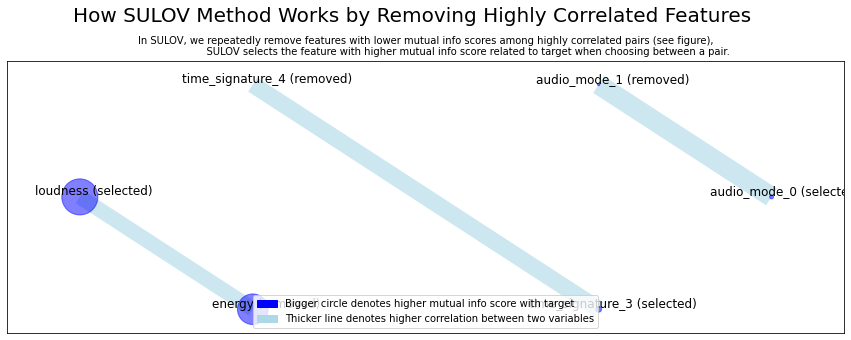

Time taken for SULOV method = 3 seconds
    Adding 0 categorical variables to reduced numeric variables  of 30
Final list of selected 30 vars after SULOV = ['acousticness', 'audio_valence', 'danceability', 'instrumentalness', 'key_0', 'key_1', 'key_10', 'key_11', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'liveness', 'song_duration_ms', 'song_name_0', 'song_name_1', 'song_name_2', 'song_name_3', 'speechiness', 'tempo', 'time_signature_0', 'time_signature_1', 'time_signature_5', 'loudness', 'time_signature_3', 'audio_mode_0']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 30 
    Taking top 8 features 

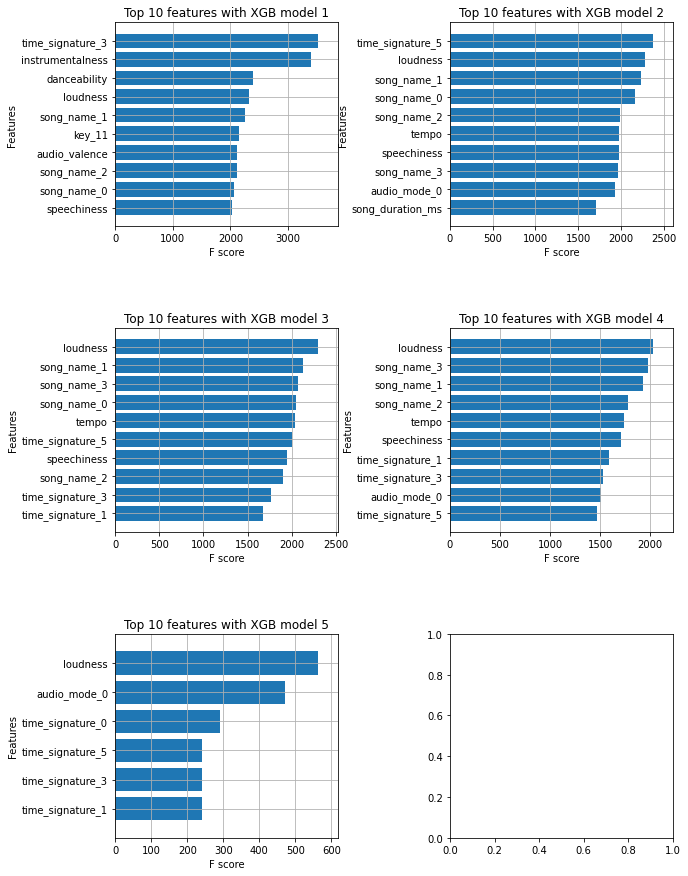

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 18 important features:
['time_signature_3', 'instrumentalness', 'danceability', 'loudness', 'song_name_1', 'key_11', 'audio_valence', 'song_name_2', 'song_name_0', 'speechiness', 'tempo', 'song_name_3', 'song_duration_ms', 'key_1', 'time_signature_5', 'audio_mode_0', 'time_signature_1', 'time_signature_0']
Total Time taken for featurewiz selection = 15 seconds
Output contains a list of 18 important features and a train dataframe
    Time taken to create entire pipeline = 15 second(s)


In [ ]:
# Feature selection using FeatureWiz
output = FeatureWiz(corr_limit = 0.7, verbose = 2)
train_selected = output.fit_transform(train_transformed, y_transformed)

In [ ]:
output.features

['time_signature_3',
 'instrumentalness',
 'danceability',
 'loudness',
 'song_name_1',
 'key_11',
 'audio_valence',
 'song_name_2',
 'song_name_0',
 'speechiness',
 'tempo',
 'song_name_3',
 'song_duration_ms',
 'key_1',
 'time_signature_5',
 'audio_mode_0',
 'time_signature_1',
 'time_signature_0']

In [ ]:
train_selected.head()

,time_signature_3,instrumentalness,danceability,loudness,song_name_1,key_11,audio_valence,song_name_2,song_name_0,speechiness,tempo,song_name_3,song_duration_ms,key_1,time_signature_5,audio_mode_0,time_signature_1,time_signature_0
0,0,0.000133,3.164909,-1.069825,-0.608640,0,1.937658,-0.019811,0.817992,0.281675,5.818130,-0.193753,4,0,0,0,0,0
1,0,0.000000,3.458429,-1.673838,-2.767408,0,1.512518,1.702546,2.652255,0.477123,3.665707,-0.036539,3,0,0,2,0,0
2,0,2.017287,4.702698,-2.045077,0.085520,0,1.324475,0.019121,-0.069879,0.758797,4.314353,-0.230422,3,0,0,0,0,0
3,0,0.016021,2.877770,-1.290060,-2.063229,0,0.809402,1.797555,2.524693,1.025143,4.264307,0.328397,3,0,0,0,0,0
4,0,0.000000,2.852247,-1.323239,-0.257325,0,2.346447,-2.672816,3.411562,0.299878,5.990556,-2.009984,3,0,0,0,0,0


After transforming the data using lazytransformer, 33 features were generated. Using SULOV followed by XGBoost, the number of features was reduced to 18.